In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [62]:
# Reading data from remote link
sourceurl = "http://bit.ly/w-data"
data = pd.read_csv(sourceurl)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [60]:
#Describing the data

data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


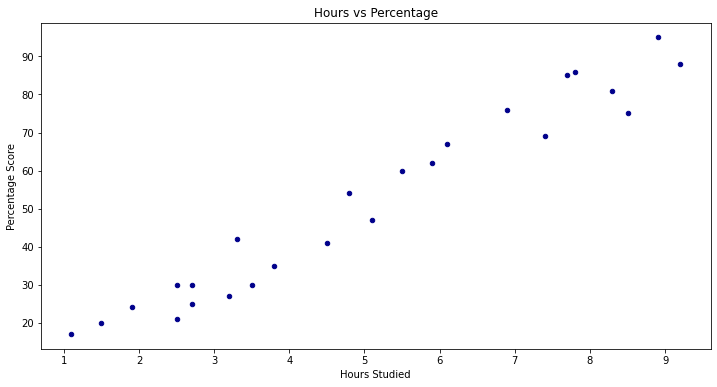

In [50]:
# Plotting the distribution of scores

%matplotlib inline
import matplotlib.pyplot as plt

plot1 = data.plot.scatter(x='Hours', y='Scores',title="Hours vs PercentageScore",c='DarkBlue',figsize=(12, 6),style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plot1

# From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Preparing the data:
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [33]:
X = data.iloc[:, :-1].values  
X = X.reshape(-1,1)
y = data.iloc[:, 1].values 
y = y.reshape (-1,1)


In [74]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.1, random_state=0) 

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.



In [75]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[2.52007671]
[[9.85475541]]


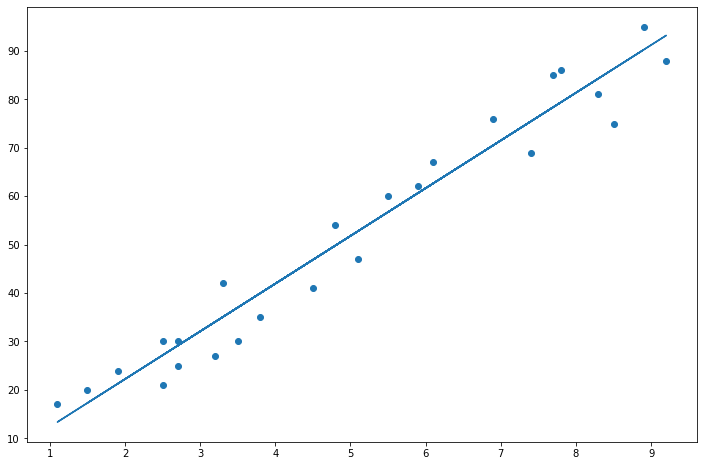

In [77]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(12,8))
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [78]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]]


In [79]:
# Comparing Actual vs Predicted
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred},index=[0])  
#df 

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


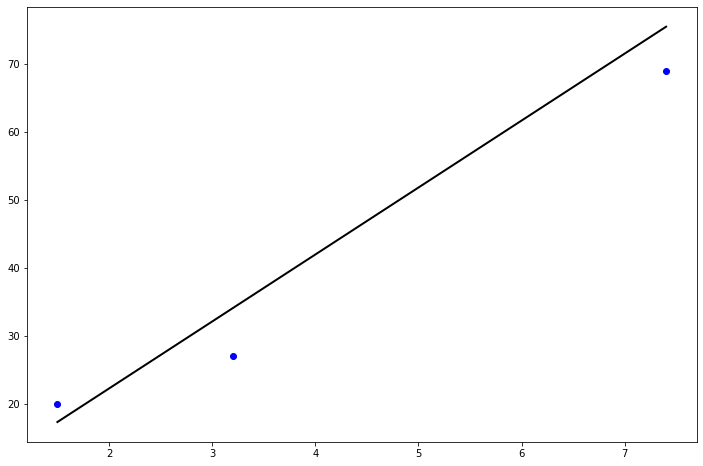

In [80]:
#Doing the visualisation for the test data
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='black', linewidth=2)
plt.show()

In [15]:
#Let’s find the values for these metrics using our test data.

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.3994503136120064
Mean Squared Error: 32.865569647342106
Root Mean Squared Error: 5.732850045774972


In [16]:
# Predicting the score based on the input
own_pred = regressor.predict([[9.25]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = [93.67656425]
